### Шаг 1. Откройте файл с данными и изучите общую информацию

Задачи на 1-ом шаге исследования:
- загрузка необходимых библиотек
- загрузка массива данных
- вывод части массива данных
- определение общего вывода в отношении массива данных

In [1]:
# загрузка необходимых библиотек
# для осуществления операций с массивом данных
import pandas as pd 
# для осуществления расчетов
import numpy as np 
from scipy import stats # в том числе для проверки гипотез
# для осуществления лемматизации
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('wordnet')
# для графической визуализации
import seaborn as sns
import matplotlib.pyplot as plt
# Изменим тему диаграмм на ggplot
plt.style.use('ggplot')
%matplotlib inline

[nltk_data] Downloading package wordnet to /home/urma/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
# загрузка массива данных
games = pd.read_csv('games.csv')

In [3]:
# вывод первых 5-ти наблюдений исходной выборочной совокупности
games.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
# вывод общей информации о переменных
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
# Вывод доли пропущенных наблюдений по каждой переменной в общей совокупности наблюдений в порядке убывания
(games.isna().sum().sort_values(ascending=False) / games.shape[0]) * 100 

Critic_Score       51.319174
Rating             40.478612
User_Score         40.089740
Year_of_Release     1.609333
Genre               0.011965
Name                0.011965
Other_sales         0.000000
JP_sales            0.000000
EU_sales            0.000000
NA_sales            0.000000
Platform            0.000000
dtype: float64

Причины пропущенных наблюдений:
- *оценка критиков, пользователей*: поскольку оценивание сопряжено с временными издержки и умственными усилиями (сопоставление с другими играми, определение положительных и отрицательных аспектов игры), то эксперты и пользователи сразу не ставят оценки, так как игру тяжело сразу оценить. Заполнить пропущенные наблюдения по оценкам критиков и пользователей можно модой, т.е. наиболее часто встречающаяся оценка может служить вариантом заполнения оценок игр.
- *название игры, год выпуска игры, рейтинг ESRB*: возможно возникли технические неполадки при заполнении наблюдений. С другой стороны, если отсутствует название игры, то и определить год выпуска крайне тяжело, даже невозможно. Аналогично и с жанром, если отсутствует название игры, то и определить жанр весьма трудно, даже невозможно. Далее, если нет названия, жанра, периода выпуска, то и поставить рейтинг вслепую будет нецелесообразно. Варианты заполнения пропущенных наблюдений: (1) *название игры*: скорее всего невозможно, (2) *год выпуска*: опираясь на название игры можно поискать дополнительную информацию из других источников и заполнить год, (3) *рейтинг ESRB*: опираясь на жанр игры и определив общий контент, который содержится в игре можно классифицировать игры по возрастным ограничениям.

#### Промежуточные выводы
Выборочная совокупность содержит 16 715 наблюдений, каждое из которых характеризуется следующими переменными (в скобках указаны *тип переменных*, **доля пропущенных наблюдений в процентах**):
- Name: название игры (*строковый формат*, **0.0119**)
- Platform: платформа (*строковый формат*, **0**)
- Year_of_Release: год выпуска (*формат с плавающей точкой*, **1.609**)
- Genre: жанр игры (*строковый формат*, **0.0119**)
- NA_sales: продажи в Северной Америке в млн. долларов (*формат с плавающей точкой*, **0**)
- EU_sales: продажи в Европе в млн. долларов (*формат с плавающей точкой*, **0**)
- JP_sales: продажи в Японии в млн. долларов (*формат с плавающей точкой*, **0**)
- Other_sales: продажи в других странах в млн. долларов (*формат с плавающей точкой*, **0**)
- Critic_score: оценка критиков, где максимум 100 (*формат с плавающей точкой*, **51.319**)
- User_Score: оценка пользователей, где максимум 10 (*строковый формат*, **40.089**)
- Rating: рейтинг (*строковый формат*, **40.478**) от организации Entertainment Software Rating Board (здесь и далее, ESRB). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

### Шаг 2. Подготовьте данные

Задачи на 2-ом шаге исследования:
- замена названий столбцов массива данных
- преобразование данных в нужные типы
- обработка пропущенных наблюдений
- расчет суммарных продаж во всех регионах с перенесением полученных значений в отдельный столбец

#### Замена названий столбов массива данных

In [6]:
# Замена названий столбцов, а именно приведение к нижнему регистру
# посредством метода .set_axis(), где в качестве первого аргумента
# передадим названия столбцов исходной выборочной совокупности,
# приведенные к нижнему регистру методом .lower()
try: # воспользуемся исключениям
    games.set_axis([column.lower() for column in games.columns],
               axis='columns', # замена по столбцам,
               inplace=True) # осуществляется на месте
except:
    print('При изменении названий столбцов возникла ошибка')
else:
    print('Изменение названий столбцов выполнено успешно:')
    print(games.columns)

Изменение названий столбцов выполнено успешно:
Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')


In [7]:
# Приведение к нижнему регистру наблюдений в следующих переменных:
# название игры "name", платформа "platform", жанр игры "genre", рейтинг ERSB "rating".
for variable in ['name','platform','genre','rating']:
    games[variable] = games[variable].str.lower()

#### Преобразование данных в нужные типы

In [8]:
# Осуществим замену типа переменной "год выпуска игры" с формата с плавающей точкой в целочисленный формат
try: # воспользуемся исключениями
    games['year_of_release'] = games['year_of_release'].astype('int')
except:
    print('При изменении типа переменной "год выпуска игры" возникла ошибка')

При изменении типа переменной "год выпуска игры" возникла ошибка


Ошибка скорее возникла в силу наличия пропущенных наблюдений NaN, которые не конвертируются в целочисленный формат. Попробуем заполнить пропущенные наблюдения. Первым подходом может быть подбор "года выпуска игры" с похожими наблюдениями. Другими словами, если есть дублирующие наблюдения без учета года выпуска, то восполним пропуски согласно году выпуска похожих игр. Для этого в первую очередь приведем к словарной основе (лемматизируем) названия игр.

In [9]:
# Инициализация лемматизатора
lemmatizer = WordNetLemmatizer()
# Определяем пустой список, в котором будут определены лемматизированные названия игр
lemmas = []
for game_name in games['name']:
    try:
        # Методом .lemmatize() приведем к словарной основе названия игр.
        # Лемматизированные названия игр поместим в столбец lemmatized_name
        games['lemmatized_name'] = lemmas.append(lemmatizer.lemmatize(game_name))
    except:
        print('При лемматизации названий игр возникла ошибка')
        
        break

При лемматизации названий игр возникла ошибка


Ошибка может возникнуть из-за пропущенных наблюдений в переменной "название игр". Взглянем на данные пропущенные наблюдения.

In [10]:
# Определим наблюдения по которым отсутствует информация по названию игры
games[games['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,lemmatized_name
659,NaN,gen,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN,None
14244,NaN,gen,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN,None


Действительно при отсутствии информации о названии игры, отсутствует и жанр, год выпуска, рейтинг ESRB. В данном случае, стоит удалить подобные наблюдения, так как восстановить название игры (а отсюда и жанр игры) невозможно, так как в 1993 году было создано множество игр и вероятность подобрать правильное название (с учетом имеющихся остальных характеристик) крайне мала. Поэтому удалим данные два наблюдения.

In [11]:
# Удалим пропущенные наблюдения в переменной "название игры"
games.dropna(subset=['name'], inplace=True)

In [12]:
# Определяем пустой список, в котором будут определены лемматизированные названия игр
lemmas = []
for game_name in games['name']:
    # Методом .lemmatize() приведем к словарной основе названия игр.
    lemmas.append(lemmatizer.lemmatize(game_name))

In [14]:
# Лемматизированные названия игр поместим в столбец lemmatized_name
games['lemmatized_name'] = lemmas

In [15]:
# Проверим наличие дублированных наблюдений не принимая во внимание столбец с исходными названиями игр
print('Количество дублированных наблюдений: {}'.format(games.drop(columns='name').duplicated().sum()))

Количество дублированных наблюдений: 0


В отношении переменной "год выпуска игры" year_of_release, стоит отметить следующее:
- разработка самой первой игры датируется 1980-м годом, самая новая игра появилась в 2016 году
- отсутствуют дублирующие наблюдений с учетом лемматизированных названий игр. Тем самым, подбирать год выпуска для каждой игры в соответствие с похожими (дублирующими) играми невозможно.
- доля пропущенных наблюдений по переменной "год выпуска игры" составляет 1.6%, что приблизительно равно (1.6 х 16 715) / 100 = 267 наблюдениям. Поэтому, подбирать отдельно для каждой игры соответствующий год выпуска весьма времязатратное задание.
- заполнение пропущенных наблюдений числовыми характеристиками скорее не подойдет, так как каждый год разрабатывается множество игр и подбор даты может привести к ошибками и смещениям дальнейших результатов исследования.
- замена нулевыми либо единичными величинами может обусловить затруднения при построении диаграмм (так как возникнет резкий скачок от нуля/единицы до 1980).

Тем самым, пропущенные наблюдения по переменной "год выпуска" оставим в прежнем виде.

In [16]:
# Изменим тип переменной "оценка пользователя" со сторокового формата в формат с плавающей точкой
try: # воспользуемся исключениями
    games['user_score'] = games['user_score'].astype('float')
except:
    print('При изменении типа переменной "оценка пользователя" возникла ошибка')

При изменении типа переменной "оценка пользователя" возникла ошибка


Определим уникальные значения переменной "оценка пользователя" для того, чтобы выявить причину ошибки.

In [17]:
# вывод уникальных величин переменной "оценка пользователя" в убывающем порядке.
games['user_score'].sort_values(ascending=False).unique()

array(['tbd', '9.7', '9.6', '9.5', '9.4', '9.3', '9.2', '9.1', '9', '8.9',
       '8.8', '8.7', '8.6', '8.5', '8.4', '8.3', '8.2', '8.1', '8', '7.9',
       '7.8', '7.7', '7.6', '7.5', '7.4', '7.3', '7.2', '7.1', '7', '6.9',
       '6.8', '6.7', '6.6', '6.5', '6.4', '6.3', '6.2', '6.1', '6', '5.9',
       '5.8', '5.7', '5.6', '5.5', '5.4', '5.3', '5.2', '5.1', '5', '4.9',
       '4.8', '4.7', '4.6', '4.5', '4.4', '4.3', '4.2', '4.1', '4', '3.9',
       '3.8', '3.7', '3.6', '3.5', '3.4', '3.3', '3.2', '3.1', '3', '2.9',
       '2.8', '2.7', '2.6', '2.5', '2.4', '2.3', '2.2', '2.1', '2', '1.9',
       '1.8', '1.7', '1.6', '1.5', '1.4', '1.3', '1.2', '1.1', '1', '0.9',
       '0.7', '0.6', '0.5', '0.3', '0.2', '0', nan], dtype=object)

Наряду и числовые значениями, имеем наблюдения с стороковым форматом.

Согласно  [толковому словарю английского языка](https://dictionary.cambridge.org/ru/%D1%81%D0%BB%D0%BE%D0%B2%D0%B0%D1%80%D1%8C/%D0%B0%D0%BD%D0%B3%D0%BB%D0%B8%D0%B9%D1%81%D0%BA%D0%B8%D0%B9/tbd "Cambridge Dictionary"), аббревиатура "tbd" может расшифровываться как "to be decided". Тем самым, кроется неопределенность по наблюдениям с данной меткой.

Заполнение данных пропущенных наблюдений нулевыми и единичными значениями нежелательно, так как может привести к повышению значимости в сторону уже имеющихся фактических нулевых и единичных величин переменной "оценка пользователя", что может привести к некорректных результатам дальнейшего анализа в силу смещения. Поэтому заменим наблюдения с меткой "tbd" на NaN.

In [18]:
# Осуществим замену величин переменной "оценка пользователей" с меткой "tbd" на величину NaN посредством np.nan
games.loc[games['user_score']=='tbd','user_score'] = np.nan
# Альтернативный вариант замены оценок пользователей с меткой "tbd" на величины NaN
# games.query('user_score=="tbd" ')['user_score'] = np.nan

In [19]:
# Заменим строковый формат переменной "оценка пользователя" в формат с плавающей точкой
try: # воспользуемся исключениями
    games['user_score'] = games['user_score'].astype('float')
except:
    print('При изменении типа переменной "оценка пользователя" возникла ошибка')
else:
    print('Изменение типа переменной "оценка пользователя" выполнено успешно')
    print(games['user_score'].head())

Изменение типа переменной "оценка пользователя" выполнено успешно
0    8.0
1    NaN
2    8.3
3    8.0
4    NaN
Name: user_score, dtype: float64


В отношении "оценок пользователя" с меткой NaN, т.е. пропущенных наблюдений, стоит отметить, что заменить на числовые характеристики нецелесообразно, так как сам процесс оценивания является весьма субъективным, и замена даже на наиболее частые, либо медианные величины может привести к ошибочным результатам дальнейшего анализа. Замена нулевыми и единичными величинами приведет к ложному повышению значимости уже имеющихся, фактических нулевых и единичных оценок пользователей. Таким образом, оставим пропущенные наблюдения по переменной "оценка пользователя".

#### Обработка пропущенных наблюдений

(1) Перейдем к заполнению пропущенных наблюдений по переменной "оценка критика".

In [20]:
# Определим числовые характеристики переменной "оценка критика"
games['critic_score'].describe()

count    8137.000000
mean       68.967679
std        13.938165
min        13.000000
25%        60.000000
50%        71.000000
75%        79.000000
max        98.000000
Name: critic_score, dtype: float64

Наименьшая оценка составляет 13 из 100, наибольшая 98 из 100.

Аналогично оценке пользователя, замена пропущенных наблюдений по переменной "оценка критика" затрудняется тем, что (а) даже замена на наиболее часто встречающиеся, либо медианные, либо средние оценки может привести к некорректному смещению результатов дальнейшего анализа, (б)  диапазон возможных значений весьма широк, (в) наряду со смещением результатов, заполнение нулевыми либо единичными величинами также может (i) привести к появлению ложных нулевых и единичных оценок, (ii) служить препятствием к корректному построению таких диаграмм как гистограмма, ящик с усами.

Тем самым, оставим пропущенные наблюдения по переменной "оценка критика" в прежнем виде.

(2) Перейдем к заполнению пропущенных наблюдений по переменной "рейтинг ESRB".

In [21]:
# Осуществим расчет уникальных значений переменной "рейтинг ESRB" 
games['rating'].value_counts()

e       3990
t       2961
m       1563
e10+    1420
ec         8
rp         3
k-a        3
ao         1
Name: rating, dtype: int64

Согласно некоторым источникам [ESRB](https://www.esrb.org/ratings-guide/ "Рейтинг ESRB"), [XboX](https://www.xbox.com/en-US/marketplace/gameratings "ESRB Rating Symbols"),  иерархия категорий следующая:
- категория "еc" (early childhood): контент подходит для детей старше 3 лет
- категория "е" ("everyone"): контент подходит для детей старше 6-ти лет, может содержать минимальное количество картинок, фэнтези и легкой формы насилия
- категория "к-а" (from kids to adults): от детей до взрослых, в последующем была заменена на категорию "е".
Источник: [ESRB history](https://www.esrb.org/history/ 'ESRB History')
- категория "е10+": контент подходит для детей от 10 лет и выше и может содержать больше картинок, фэнтези и легкой формы насилия
- категория "t" (teen): для детей старше 13 лет, может содержать насилия, жесткий юмор, немного крови
- категория "м" (mature): для детей старше 17 лет, может содержать сцены с интенсивным насилием и кровью
- категория "ао" (adult only): для детей старше 18 лет, может содержать продолжительные сцены интенсивного насилия
- категория "rp" (rating pending), игры которые появляются в рекламных, маркетинговых целях, и демо версии до официальной даты выпуска игры в продажу.

In [22]:
# Исходя из официально информации, заменим рейтинг ESRB с меткой "k-a" на более новый формат "е"
games.loc[games['rating']=='k-a','rating'] = 'e'

In [23]:
# Далее методом .Categorial определим иерархию категорий рейтинга ESRB
# в порядке повышения возрастных ограничений на игры.
# Источник: (1) https://www.esrb.org/ratings-guide/; (2) https://www.xbox.com/en-US/marketplace/gameratings
games['rating'] = pd.Categorical(games['rating'],
                                 # определяем порядок категорий
                                 categories=['ec', 'e', 'e10+', 't', 'm', 'ao', 'rp'],
                                 # который имеет значение (т.е. порядок важен)
                                 ordered=True)

Как было ранее указано, пропущенные наблюдения по переменным "оценка пользователя", "оценка критика", "рейтинг ESRB", "год выпуска игры" оставим в прежнем виде. В дополнением к этому, создадим столбцы, отражающие наличие/отсутствие пропущенных наблюдений по данным четырем переменным.

In [24]:
# Через цикл for определим столбцы, отражающие наличие/отсутствие пропущенных наблюдений по 4-м переменным:
# оценка пользователя, оценка критика, рейтинг ESRB, год выпуска игры
for variable in ['user_score','critic_score','rating','year_of_release']:
    # К дополнительному столбцу добавляем суффикс "_absent"
    games[variable+'_absent'] = games[variable].isna()

#### Расчет суммарных продаж во всех регионах с перенесением полученных значений в отдельный столбец

In [25]:
# Определим столбец "overall_sales", значения которого отражают
# сумму продаж (млн.долл.) в Северной Америке na_sales, в Европе eu_sales,
# в Японии jp_sales, в других странах other_sales.
# Операцию сложения продаж осуществим методом .eval()
games['overall_sales'] = games.eval('na_sales + eu_sales + jp_sales + other_sales')

In [26]:
# Определим общую информацию о переменных
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   name                    16713 non-null  object  
 1   platform                16713 non-null  object  
 2   year_of_release         16444 non-null  float64 
 3   genre                   16713 non-null  object  
 4   na_sales                16713 non-null  float64 
 5   eu_sales                16713 non-null  float64 
 6   jp_sales                16713 non-null  float64 
 7   other_sales             16713 non-null  float64 
 8   critic_score            8137 non-null   float64 
 9   user_score              7590 non-null   float64 
 10  rating                  9949 non-null   category
 11  lemmatized_name         16713 non-null  object  
 12  user_score_absent       16713 non-null  bool    
 13  critic_score_absent     16713 non-null  bool    
 14  rating_absent         

In [27]:
# Определим долю пропущенных наблюдений в порядке убывания
print('Доля пропущенных наблюдений:')
(games.isna().sum().sort_values(ascending=False) / games.shape[0]) * 100

Доля пропущенных наблюдений:


user_score                54.586250
critic_score              51.313349
rating                    40.471489
year_of_release            1.609526
jp_sales                   0.000000
platform                   0.000000
genre                      0.000000
na_sales                   0.000000
eu_sales                   0.000000
overall_sales              0.000000
other_sales                0.000000
year_of_release_absent     0.000000
lemmatized_name            0.000000
user_score_absent          0.000000
critic_score_absent        0.000000
rating_absent              0.000000
name                       0.000000
dtype: float64

#### Промежуточные выводы
- названия столбцов приведены к нижнему регистру
- определен столбец с лемматизированными названиями игр
- пропущенные наблюдения по переменным "год выпуска игры", "оценка пользователя", "оценка критика", "рейтинг ESRB" оставили в прежнем виде
- рейтинги пользователей с меткой "tbd" отнесены к категории пропущенных наблюдений NaN, что также позволило заменить формат данной переменной со сторокового на формат с плавающей точкой
- удалены два наблюдения, по которым отсутствовала информация по жанру и одновременно названию игры
- формат переменной "рейтинг ESRB" изменен со сторокового на формат категорий, с определением порядка иерархии в соответствие с возрастными ограничениями на контент, содержащийся в играх
- определены 4 дополнительных столбца, которые отражают наличие/отсутствие пропущенных наблюдений по 4-м переменным: оценка пользователя, оценка критика, рейтинг ESRB, год выпуска игры
- подсчитаны суммарные продажи, которые отражены в отдельном столбце

### Шаг 3. Проведите исследовательский анализ данных

Задачи на 3-м шаге исследования:
- определить сколько игр выпускалось в разные годы. Важны ли данные за все периоды?
- определить как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы? Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год. Не учитывайте в работе данные за предыдущие годы.
- Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ. Постройте график «ящик с усами» по глобальным продажам каждой игры и разбивкой по платформам. Велика ли разница в продажах? А в средних продажах на разных платформах? Опишите результат.
- Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы. Соотнесите выводы с продажами игр на других платформах.
- Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?


[Text(0.5, 0, 'год')]

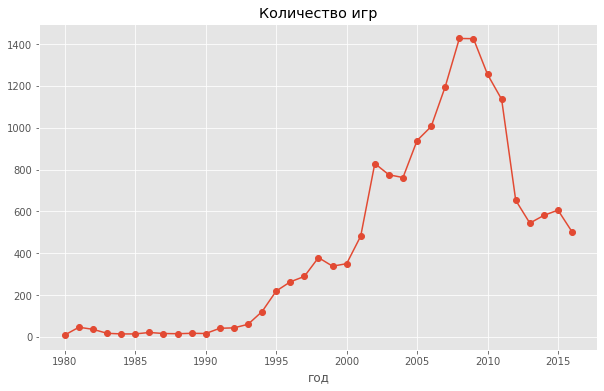

In [28]:
# Построим график, отражающий количество игр по каждому году.
(
    # В качестве функции агрегирования зададим подсчет наблюдений.
    # также зададим заголовок диаграммы, подпись горизонтальной оси
    games.pivot_table(index='year_of_release',values='name',aggfunc='count')
    .plot(title='Количество игр', legend=False, style='o-',figsize=(10,6))
    .set(xlabel='год')
)

В период 1990-2009 гг. наблюдался восходящий тренд повышения ежегодного количества выпускаемых игр. Далее, начиная с 2009 года последовал спад ежегодного количества выпускаемых игр.

Стоит отметить, что в период 1980-1990 гг. ежегодное количество игр было весьма незначительным по сравнению с последующими периодами. C 2000-го года наблюдается резкое увеличение количества игр. Тем самым, возможно стоит определить 2000 год в качестве начального временного такт рассматриваемого периода.

In [29]:
# Оставим игры, которые выпускались с 2000 года.
# Также обновим индексы
games = games.query('year_of_release >= 2000').reset_index(drop=True)

In [30]:
# Далее изменим формат переменной "год выпуска игры" с плавающей точкой в целочисленнный
games['year_of_release'] = games['year_of_release'].astype('int')

[Text(0, 0.5, 'млн.долларов')]

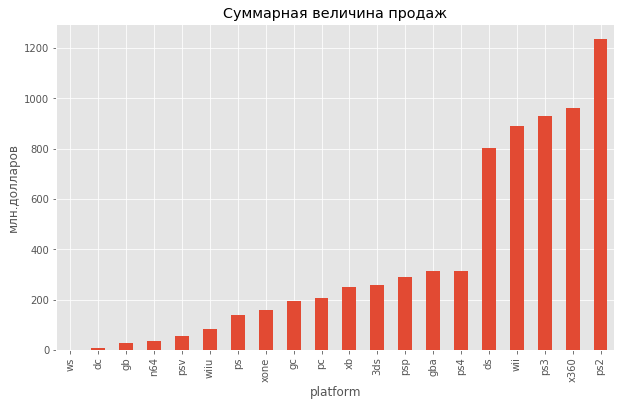

In [31]:
# Построим диаграмму, которая отражает общую величину продаж в зависимости от платформы игр.
(
    games.pivot_table(index='platform', values='overall_sales', aggfunc='sum')
    # Для наглядного представления осуществим сортировку по суммарной величине продаж в порядке возрастания.
    .sort_values(by='overall_sales')
    # Дополнительно зададим заголовок, больший размер диаграммы
    .plot(kind='bar', title='Суммарная величина продаж', legend=False, figsize=(10,6))
    .set(ylabel='млн.долларов')
)

Видим, что отличительными, в плане большого объема суммарных продаж, являются платформы: *ps, ds, wii, ps3, x360, ps2*.

In [32]:
# Определение 7-ми платформ, имеющих наибольшие объемы суммарных продаж
profitable_platform_labels = (
    games.pivot_table(index='platform', values='overall_sales', aggfunc='sum')
    .sort_values(by='overall_sales', ascending=False)
    .head(7)
    .reset_index()
    ['platform']
)
# Вывод 7-ми платформ с наибольшей прибылью
profitable_platform_labels

0     ps2
1    x360
2     ps3
3     wii
4      ds
5     ps4
6     gba
Name: platform, dtype: object

In [33]:
# Методом .isin() определим подбвыборку из игр, которые относятся к платформам с наибольшими суммарными продажами:
platform_with_largest_sales = (
    games[games['platform'].isin(profitable_platform_labels)]
    .reset_index(drop=True)
)

[Text(0, 0.5, 'млн.долларов')]

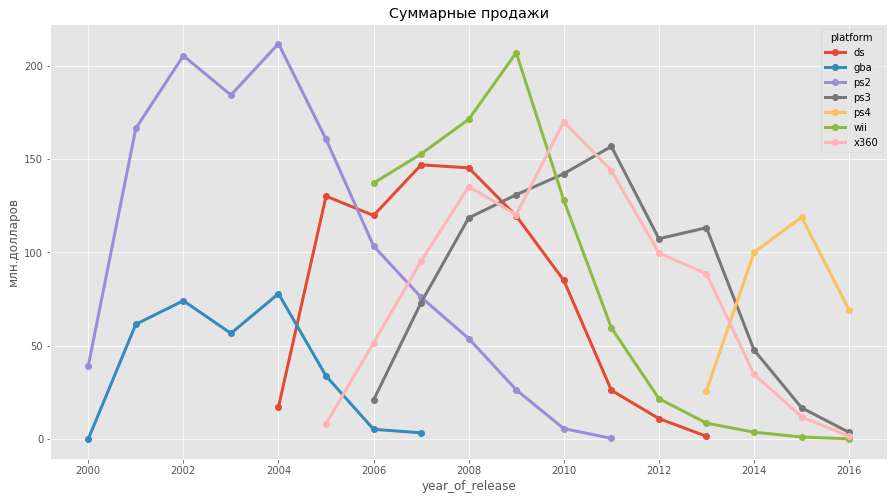

In [34]:
# Построим диаграмму, иллюстрирующую суммарные продажи в разрезе платформ по времени
(
    platform_with_largest_sales
    .pivot_table(index='year_of_release',columns='platform',values='overall_sales', aggfunc='sum')
    # Изменим стиль и толщину линий, размер диаграммы
    .plot(style='o-', figsize=(15,8),  lw=3, title='Суммарные продажи')
    # Также определим подпись горизонтальной оси
    .set(ylabel='млн.долларов')
)

Согласно диаграмме:
- за первые 5 лет суммарные продажи достигают максимум, за которым следует спад. Возможной причиной подобного характера является то, что на 5-ый год появления старой платформы разрабатываются новые платформы с лучшей графической визуализацией и игровыми возможностями. Тем самым, **в течение 5-ти лет появляются новые платформы**.
- в целом, в последующие 10 лет, после разработки, платформы начинают исчезать, т.е. **"в среднем, срок жизни" платформы составляет 10 лет**.
- период разработки наиболее новых платформ датируется 2006-м годом. Так как средний срок жизни платформы составляет 10 лет, то **актуальным периодом является 2008-2016 гг.** Если начинать с 2007 года, тогда на 2016 год приходится последний период "жизни" платформы и тем самым в 2017 году данные платформы утратят свою актуальность.

In [35]:
# Методом .query() определим подвыборку актуального периода (то есть начиная с 2008 года)
relevant_period = (
    platform_with_largest_sales
    # обозначим 2008 год в качестве начального периода
    .query('year_of_release >= 2008')
    .reset_index(drop=True)
)

[Text(0, 0.5, 'млн.долларов')]

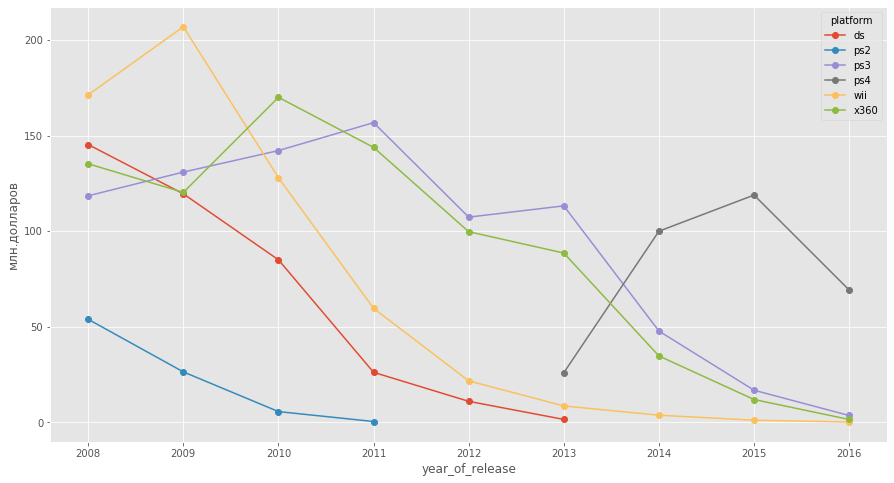

In [36]:
# Построим график, иллюстрирующий динамику суммарных продаж по каждой платформе
(
    relevant_period
    # Воспользуемся сводными таблицами
    .pivot_table(index='year_of_release', columns='platform',values='overall_sales', aggfunc='sum')
    .plot(figsize=(15,8), style='o-')
    # определим подпись оси ОУ
    .set(ylabel='млн.долларов')
)

Наблюдается общая тенденция сокращения суммарных продаж значительной части платформ. Платформа ps4 имеет более высокие объемы суммарных продаж за последние два года. Свою актуальность потеряла платформа ps2, на место которой разработаны более новые версии ps3, ps4.

Тем самым, на 2017 год актуальны следующие платформы: *ps3, ps4, x360, wii, ds*.

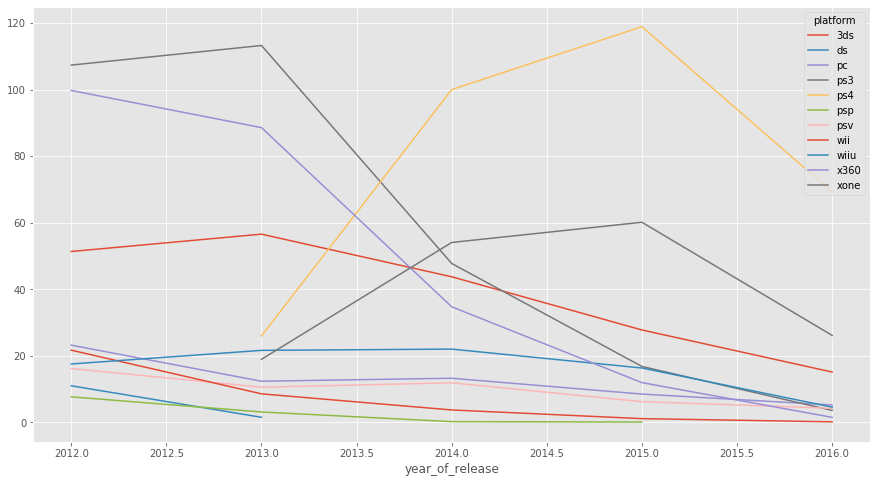

In [37]:
# Пример
games.query("year_of_release >= 2012").pivot_table(index='year_of_release', columns='platform',values='overall_sales', aggfunc='sum').plot(figsize=(15,8))

Две перспективные платформы видны отчетливо. Это PS4 и XOne. Также сюда можно отнести и 3DS. 

In [39]:
# Методом .isin() определим подвыборку из актуального периода и актуальных платформф
relevant_period_and_platforms = (
    relevant_period[relevant_period['platform'].isin(['x360','ps3','wii','ps4','ds'])]
) 
# Вывод первых 5-ти наблюдений подвыборки актуальных платформ и периода
relevant_period_and_platforms.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,lemmatized_name,user_score_absent,critic_score_absent,rating_absent,year_of_release_absent,overall_sales
0,mario kart wii,wii,2008,racing,15.68,12.76,3.79,3.29,82.0,8.3,e,mario kart wii,False,False,False,False,35.52
1,wii sports resort,wii,2009,sports,15.61,10.93,3.28,2.95,80.0,8.0,e,wii sports resort,False,False,False,False,32.77
2,new super mario bros. wii,wii,2009,platform,14.44,6.94,4.70,2.24,87.0,8.4,e,new super mario bros. wii,False,False,False,False,28.32
3,kinect adventures!,x360,2010,misc,15.00,4.89,0.24,1.69,61.0,6.3,e,kinect adventures!,False,False,False,False,21.82
4,wii fit plus,wii,2009,sports,9.01,8.49,2.53,1.77,80.0,7.4,e,wii fit plus,False,False,False,False,21.80


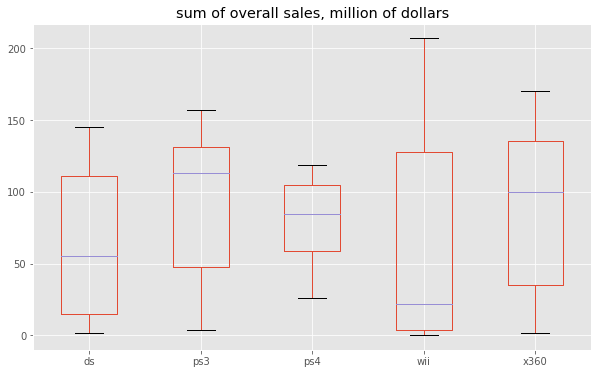

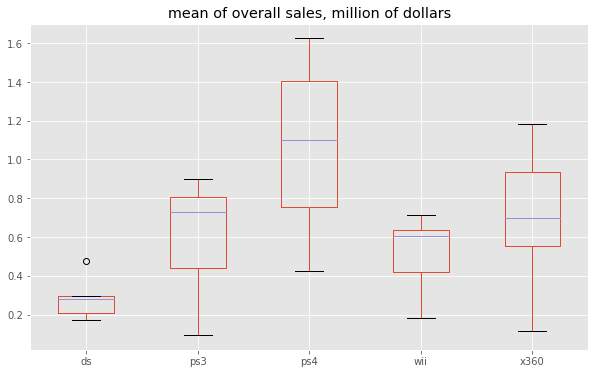

In [40]:
# Построим ящики с усами по суммарным (sum) и средним (mean) продажам по каждой платформе актуального периода
for aggfunc in ['sum','mean']:
    (
        relevant_period_and_platforms
        # Определим сводные таблицы в зависимости от агрегирующей функции
        .pivot_table(index='year_of_release',values='overall_sales', columns='platform',aggfunc=aggfunc)
        # Увеличим размер ящиков с усами
        .plot(kind='box', figsize=(10,6))
        # Зададим заголовок диаграмм в зависимости от используемых агрегирующих функций
        .set(title=aggfunc + ' of overall sales, million of dollars')
    )
    plt.show()

Согласно первой диаграмме (sum of overall sales):
- медиана суммарных продаж платформы ps3 превышает медианную величину общих продаж платформ x360, ps4
- суммарные продажи платформы wii имеют правую скошенность (толстый правый хвост), т.е. есть весьма большие величины суммарных продаж по платформе wii по сравнению с суммарными продажами платформ ps3, x360
- медиана суммарных продаж платформы x360 значительно превышает медиану суммарных продаж платформы wii, ps4.
- медиана суммарных продаж платформы ds превышает медианы суммарных продаж платформы wii.

Согласно второй диаграмме (mean of overall sales):
- имеет наибольшая медиана наблюдается у платформы ps4
- средняя величина продаж платформы ps3 имеет левую скошенность (толстый правый хвост)
- медиана средней величины продаж платформы ps3 превышает медиану средней величины платформ wii, x360
- наблюдается широкйи разброс средней величины продаж платформы x360, что отражается длинными "усами".

In [41]:
# Методом .query() выделим подвыборки по каждой из платформ:
# (a) x360
x360 = relevant_period_and_platforms.query('platform=="x360" ').reset_index(drop=True)
# (б) ps3
ps3 = relevant_period_and_platforms.query('platform=="ps3" ').reset_index(drop=True)
# (в) wii
wii = relevant_period_and_platforms.query('platform=="wii" ').reset_index(drop=True)
# (г) ps4
ps4 = relevant_period_and_platforms.query('platform=="ps4" ').reset_index(drop=True)
# (д) ds
ds = relevant_period_and_platforms.query('platform=="ds" ').reset_index(drop=True)

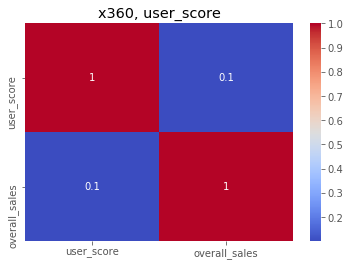

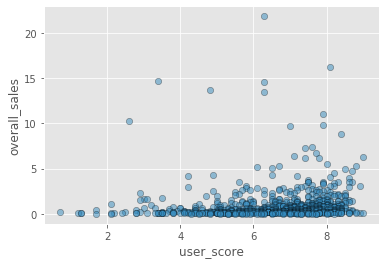

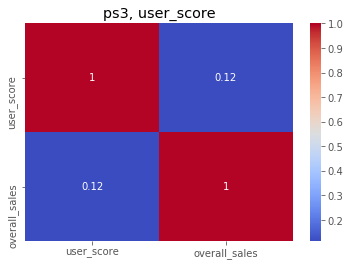

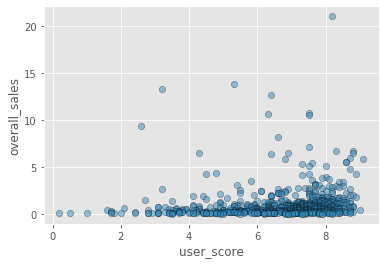

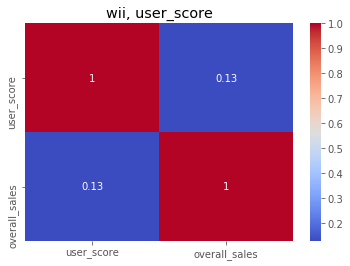

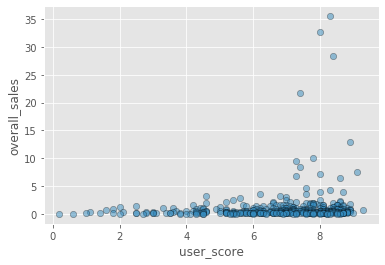

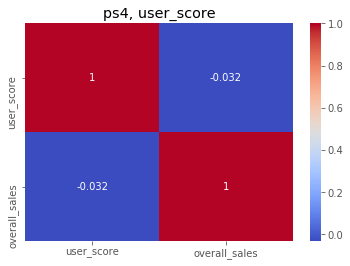

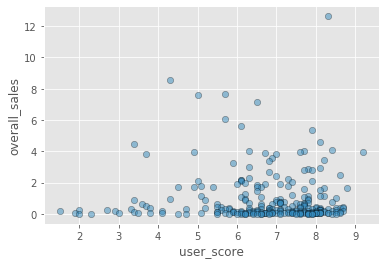

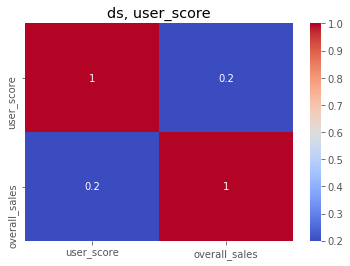

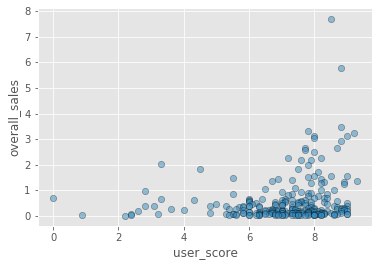

In [42]:
# Определим словарь трех платформ х350, ps3, wii, где ключи отражают метку, значения: массив платформ
dict_relevant_platforms = {'x360':x360,'ps3':ps3,'wii':wii,'ps4':ps4, 'ds':ds}

# В разрезе оценки пользователя через цикл for для каждого ключа и величин словаря платформ
for platform_label, platform_data in dict_relevant_platforms.items():
    # построим корреляционную матрицу в форме тепловой диаграммы
    sns.heatmap(platform_data.query('user_score_absent==False')[['user_score','overall_sales']].corr(),
                annot=True, cmap='coolwarm')
    # Определяем заголовок диаграмм в зависимости от типа платформы
    plt.title(platform_label+', user_score')
    # Построим диаграммы рассеяния суммарных продаж (ось ОУ) в зависимости от оценки пользователя (ось ОХ).
    platform_data.plot(x='user_score',y='overall_sales', kind='scatter', edgecolor='black', s=40, alpha=0.5)
    # Вывод соответствующих диаграмм
    plt.show()

В контексте платформы х360 коэффициент корреляция между суммарными продажами и оценками пользователей составляет **0.1**. В контексте платформы ps3 коэффициент корреляция между суммарными продажами и оценками пользователей составляет **0.12**. В контексте платформы wii коэффициент корреляция между суммарными продажами и оценками пользователей составляет **0.13**. В контексте платформы ps4 коэффициент корреляция между суммарными продажами и оценками пользователей составляет **-0.032**.  В контексте платформы ds коэффициент корреляция между суммарными продажами и оценками пользователей составляет **-0.2**.

Для всех платформ значительная часть суммарных продаж сконцентировано в диапазоне от 1-5 млн. долларов независимо от оценки пользователей.

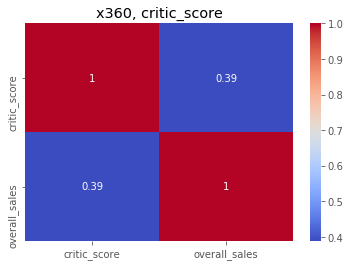

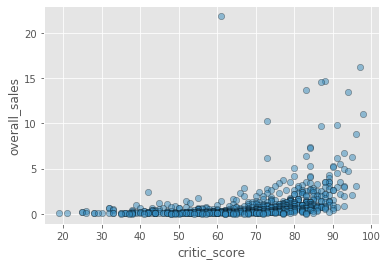

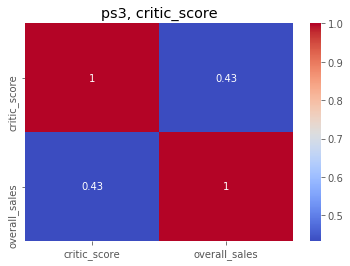

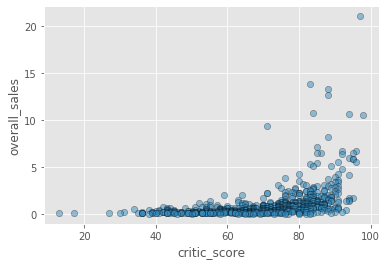

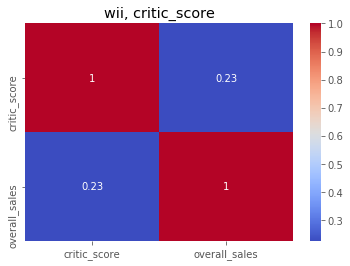

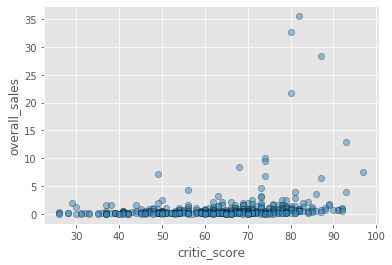

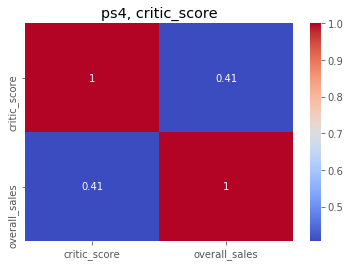

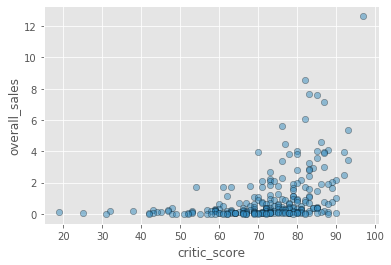

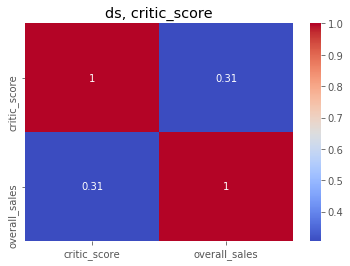

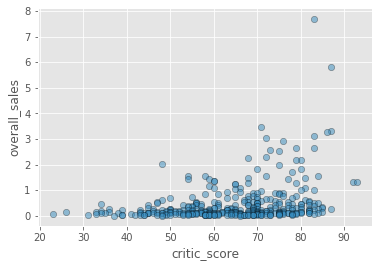

In [43]:
# В разрезе оценки критика через цикл for для каждого ключа и величин словаря платформ
for platform_label, platform_data in dict_relevant_platforms.items():
    # построим корреляционную матрицу в форме тепловой диаграммы
    sns.heatmap(platform_data.query('critic_score_absent==False')[['critic_score','overall_sales']].corr(),
                annot=True, cmap='coolwarm')
    # Определяем заголовок диаграмм в зависимости от типа платформы
    plt.title(platform_label+', critic_score')
    # Построим диаграммы рассеяния суммарных продаж (ось ОУ) в зависимости от оценки критика (ось ОХ).
    platform_data.plot(x='critic_score',y='overall_sales', kind='scatter', edgecolor='black', s=40, alpha=0.5)
    # Вывод соответствующих диаграммм
    plt.show()

В контексте платформы х360 коэффициент корреляция между суммарными продажами и оценками критиков составляет **0.39**. В контексте платформы ps3 коэффициент корреляция между суммарными продажами и оценками критиков составляет **0.43**. В контексте платформы wii коэффициент корреляция между суммарными продажами и оценками критиков составляет **0.33**. В контексте платформы wii коэффициент корреляция между суммарными продажами и оценками критиков составляет **0.41**. В контексте платформы ds коэффициент корреляция между суммарными продажами и оценками критиков составляет **0.21**. Для всех платформ значительная часть суммарных продаж сконцентировано в диапазоне от 1-5 млн. долларов независимо от оценки крититов. Для платформ x360, ps3, ps4 с повышением оценки критиков повышается суммарная величина продаж.

Тем самым, по сравнению с критикой пользователей, наблюдается **более сильная связь** между суммарными продажами и оценками критиков. Возможной причиной подобного различия является то, что при приобретении игр клиенты больше ориентируются на оценки экспертов, которые более осведомлены и компетенты, нежели на простые пользователи. Тем самым оценка эксперта внушает большее доверие/недоверие к игре, что и обусловливает повышение суммарных продаж.

[Text(0, 0.5, 'млн.долларов'), Text(0.5, 0, 'жанр игры')]

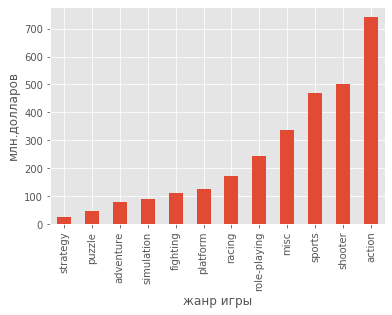

In [44]:
# Построим столбиковую диаграмму, которая иллюстрирует суммарную величину продаж в зависимости от жанра игры.
(
    relevant_period_and_platforms
    # Сгруппируем по жанрам и выделим столбец с общей величиной продаж по миру
    .groupby('genre')['overall_sales']
    # Вычислим суммарную величину продаж
    .sum()
    # Отсортируем по возрастанию
    .sort_values()
    # Построим столбиковую диаграмму
    .plot(kind='bar')
    # Определим подписи осей
    .set(xlabel='жанр игры', ylabel='млн.долларов')
)

Таким образом, игры с активным участием пользователя, которые относятся к жанру action ([требующие прохождение определенных испытаний](https://www.idtech.com/blog/different-types-of-video-game-genres "Жанры игр")), shooter (стрелялки), sports, имеют наибольшие величины суммарных продаж. Игры с меньшей интенсивностью действий (например, логические задания), также относящиеся к жанру puzzle имеют наименьшие суммарные продажи.

#### Промежуточные выводы:
- С 2000-го года резкий рост количества выпущенных игр. Наибольшее количество игр выпущено в 2008 году около 1400 игр, 2009 год чуть более 1400 игр. После 2009 года наблюдается нисходящий тренд количества выпущенных игр.
- платформ с наибольшими суммарными продажами (в скобках указаны продажи в млн. долларов): ps2 (1233), x360 (961), ps3 (931), wii (891), ds (802), ps (727).
- в течение 5-ти лет появляются новые платформы.
- в среднем, срок жизни" платформы составляет 10 лет.
- актуальным периодом является 2008-2016 гг.
- для всех трех платформ значительная часть суммарных продаж сконцентировано в диапазоне от 1-5 млн. долларов независимо от оценки пользователей.
- по сравнению с критикой пользователей, наблюдается **более сильная связь** между суммарными продажами и оценками критиков, выраженная в более высокой величине коэффициентов корреляций
- наблюдается значительная разница в суммарных продажах в зависимости от жанра игры: игры с жанрами action, shooter, sport имеют наибольшие сумарные продажи, в то время как игры с жанрами puzzle, strategy, adventure - наименьшие суммарные продажи.
- **перспективными на 2017 год** являются следующие платформы: ds, ps3, ps4, x360, wii.

### Шаг 4. Составьте портрет пользователя каждого региона

Задачи на 4-ом шаге исследования:

- Определите для пользователя каждого региона (NA, EU, JP):
    - Самые популярные платформы (топ-5). Опишите различия в долях продаж.
    - Самые популярные жанры (топ-5). Поясните разницу.
- Влияет ли рейтинг ESRB на продажи в отдельном регионе?

[Text(0, 0.5, 'млн.долларов')]

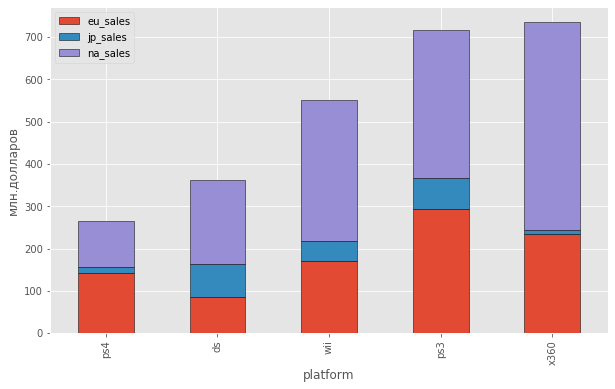

In [45]:
# Подсчитаем долю продаж по Северной Америке na_sales_fraction, Европе eu_sales_fraction,
# Японии jp_sales_fraction в разрезе платформ.
(
    relevant_period
    .pivot_table(index='platform',values=['na_sales','eu_sales','jp_sales'], aggfunc='sum')
    # Отсортируем продажи в порядке возрастания
    .sort_values(by=['na_sales','eu_sales','jp_sales'])
    # Выберем топ-5 (т.к. сортировали по возрастанию, то наибольшие величины в самом низу сводной таблицы)
    .tail(5)
    # Воспользуемся аргументом stacked=True для различий в долях продаж
    .plot(kind='bar', figsize=(10,6), edgecolor='black', stacked=True)
    .set(ylabel='млн.долларов')
)

Согласно столбикой диаграмме:
- наибольшую долю по всем платформам составляют продажи в Северной Америке, далее следуют продажи в Европе, и замыкают список продажи в Японии
- наибольшие суммарные продажи обеспечили игры на платформе x360, далее ps3, wii, ds, ps2.

[Text(0, 0.5, 'млн. долларов')]

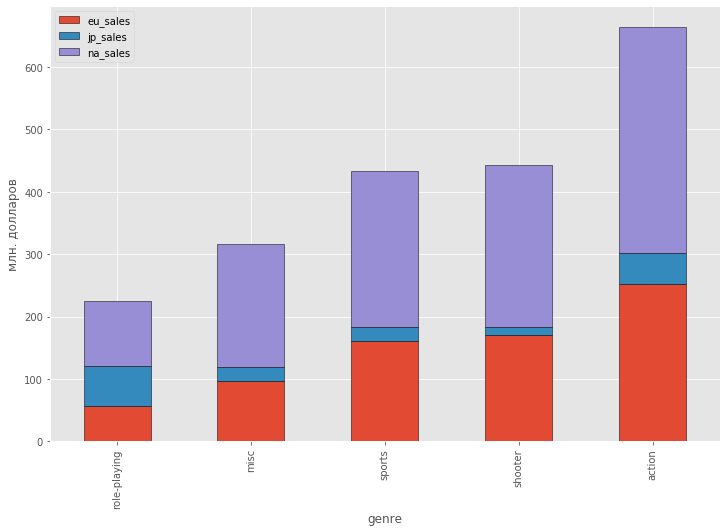

In [46]:
# Построим столбиковую диаграмму, которая иллюстрирует доли продаж по трем регионам:
# Северная Америка, Европа, Япония (ось ОУ) в разрезе жанров игр (ось ОЧ)
(
    relevant_period
    .pivot_table(index='genre',values=['na_sales','eu_sales','jp_sales'], aggfunc='sum')
    # отсортируем суммарные продажи по возрастанию
    .sort_values(by=['na_sales','eu_sales','jp_sales'])
    # Выберем топ-5 (т.к. сортировали по возрастанию, то наибольшие величины в самом низу сводной таблицы)
    .tail(5)
    .plot(kind='bar', stacked=True, edgecolor='black', figsize=(12,8))
    .set(ylabel='млн. долларов')
)

Самыми популярными жанрами в Северной Америке и Европе являются action, sports, shooter, misc, role-playing. В то время как в Японии наиболее популярными являются игры с жанром role-playing, далее action, sports, misc, shooter.

/home/urma/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


[Text(0, 0.5, 'млн. долларов')]

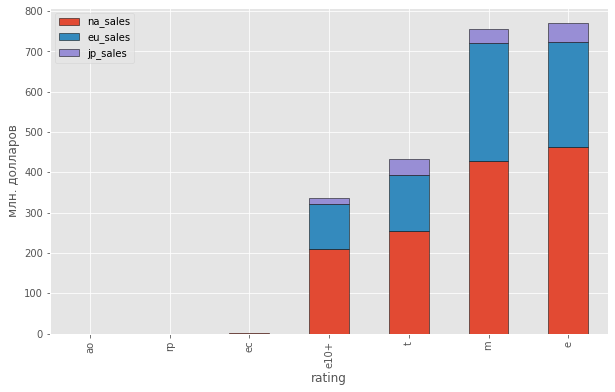

In [47]:
# Построим столбиковую диаграмму, которая иллюстрирует долю суммарных продаж по трем регионам:
# Северная Америка, Европа, Япония (ось ОУ) в разрезе рейтинга ESRB (ось ОХ)
(
    relevant_period
    # Осуществим группировку по рейтингу ESRB, выделим столбцы с суммарными продажами трех регионов
    .groupby('rating')['na_sales','eu_sales','jp_sales']
    .sum()
    # отсортируем суммарные продажи по возрастанию
    .sort_values(by=['na_sales','eu_sales','jp_sales'])
    .plot(kind='bar', stacked=True, edgecolor='black', figsize=(10,6))
    .set(ylabel='млн. долларов')
)

#### Промежуточные выводы
(1): Наибольшую долю по всем платформам составляют продажи в Северной Америке, далее следуют продажи в Европе, и замыкают список продажи в Японии. Наибольшие суммарные продажи обеспечили игры на платформе x360, далее ps3, wii, ds, ps2.

(2) Самыми популярными жанрами в Северной Америке и Европе являются action, sports, shooter, misc, role-playing. В то время как в Японии наиболее популярными являются игры с жанром role-playing, далее action, sports, misc, shooter.

(3): Не наблюдается однозначного влияния рейтинга ESRB на суммарные величины продаж по трем регионам: в Северной Америке, Европе, Японии наибольшие продажи обеспечили игры со следующими рейтингами:
- e (контент для детей старше 6 лет),
- m (для детей старше 17 лет,
- t (для детей старше 13 лет),
- e10+ (контент для детей от 10 лет).

Наименьшие продажи наблюдаются по играм со следующими рейтингами ESRB:
- ao (для подростков старше 18 лет),
- ec (контент для детей старше 3 лет),
- rp (игры которые появляются в рекламных, маркетинговых целях).

### Шаг 5. Проверьте гипотезы

Задачи на 5-ом шаге исследования:
- Проверить гипотезы
    - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
    - Средние пользовательские рейтинги жанров Action (англ. «действие») и Sports (англ. «виды спорта») разные.

Задайте самостоятельно пороговое значение alpha.
- Поясните:
    - Как вы сформулировали нулевую и альтернативную гипотезы;
    - Какой критерий применили для проверки гипотез и почему.


In [48]:
# В качестве уровня значимости зададим 5 процентов
alpha = 0.05

In [49]:
# Определим подвыборку игр платформы Xbox One
# здесь и далее в качестве начального периода выступает 2008 год,
# также отбираем наблюдения по которым присутствует информация по пользовательским рейтингам
x_one = games.query('year_of_release >= 2008 and platform=="xone" and user_score_absent==False')
# Определим подвыборку игр платформы PC
pc = games.query('year_of_release >= 2008 and platform=="pc" and user_score_absent==False')
# Определим подвыборку игр жанра Action
action = games.query('year_of_release >= 2008 and genre=="action" and user_score_absent==False ')
# Определим подвыборку игр жанра Sports
sports = games.query('year_of_release >= 2008 and genre=="sports" and user_score_absent==False')

In [50]:
# Определяем словарь 4-х подвыборок
x_one_pc_action_sports_dict = {'x_one':x_one,'pc':pc,'sports':sports,'action':action}

# Через цикл for для каждой из 4-х подвыборок вычисляет дисперсию пользовательских оценок
for label, data in x_one_pc_action_sports_dict.items():
    print('Дисперсия пользовательских рейтингов для '+label+':')
    print('{:.3f}'.format(data['user_score'].var()) )

Дисперсия пользовательских рейтингов для x_one:
1.907
Дисперсия пользовательских рейтингов для pc:
2.362
Дисперсия пользовательских рейтингов для sports:
2.927
Дисперсия пользовательских рейтингов для action:
1.801


В контексте проверки равность средних пользовальских рейтингов платформ Xbox One и PC, нулевая гипотеза $Н_0$ будет предполагать "нет, разницы нет", т.е. исследуемые параметры **равны**. Альтернативная гипотеза $H_1$, напротив, будет предполагать "да, разница есть", т.е. исследуемые параметры **разные**. Тем самым, для пользовательских оценок игр платформ Xbox One и PC имеем следующие статистические гипотезы:
$$H_0: \bar{Score}_{Xbox} = \bar{Score}_{PC}$$
$$H_1: \bar{Score}_{Xbox} \neq \bar{Score}_{PC}$$

- метод .ttest_1samp() в нашем случае не подойдет, так как перед нами не ставилась задача равенства/неравенства исследуемого параметра **из одной группы** определенной величине. Напротив, пытаемся исследовать равенство параметров для наблюдений из **двух групп** (в частности, между платформами Xbox One и PC).
- метод .ttest_rel() в нашем случае не подойдет, так как перед нами не ставилась задача определения равности исследуемых параметров *до* и *после* определенного эксперимента, регуляторной меры.

In [51]:
# Методом .ttest_ind() вычислим t-статистику и р-значение для средних пользовательских оценок
# в контексте двух платформ Xbox One, PC
x_one_pc_ttest = stats.ttest_ind(x_one['user_score'], pc['user_score'], equal_var=False)
# Вывод на печать уровня статистической значимости и р-значения для соответствующей t-статистики
print('Уровень значимости: {alpha}, p-значение для t-статистики: {pvalue:.3f}'
      .format(alpha=alpha, pvalue=x_one_pc_ttest.pvalue))

# Если полученное р-значение меньше 5-ти процентного уровня значимости
if x_one_pc_ttest.pvalue < alpha:
    # Нулевая гипотеза о разности (неравенства) исследуемых параметров отвергается
    print('Нулевая гипотеза о равенстве средних пользовательских рейтингов платформ Xbox One и PC отвергается')
else:
    # В противном случае, нулевая гипотеза не отвергается
    print('Нулевая гипотеза о равенстве средних пользовательских рейтингов платформ Xbox One и PC не отвергается')

Уровень значимости: 0.05, p-значение для t-статистики: 0.111
Нулевая гипотеза о равенстве средних пользовательских рейтингов платформ Xbox One и PC не отвергается


Далее, перейдем к проверке второй статистической гипотезы.

В контексте средних пользовальских рейтингов жанров Action  и Sports, нулевая гипотеза $Н_0$ будет предполагать "нет, разницы нет", т.е. исследуемые параметры **равны**. Альтернативная гипотеза $H_1$, напротив, будет предполагать "да, разница есть", т.е. исследуемые параметры **разные**. Тем самым, для пользовательских оценок игр жанров Action и Sports имеем следующие статистические гипотезы:
$$H_0: \bar{Score}_{Action} = \bar{Score}_{Sports}$$
$$H_1: \bar{Score}_{Action} \neq \bar{Score}_{Sports}$$

- метод .ttest_1samp() в нашем случае не подойдет, так как перед нами не ставилась задача равенства исследуемого параметра **из одной группы** определенной величине. Напротив, пытаемся исследовать равенство параметров для наблюдений из **двух групп** (в частности, между жанрами Action и Sports).
- метод .ttest_rel() в нашем случае не подойдет, так как перед нами не ставилась задача определения равности исследуемых параметров *до* и *после* определенного эксперимента, регуляторной меры.

In [52]:
# Методом .ttest_ind() вычислим t-статистику и р-значение для средних пользовательских оценок
# в контексте двух жанров Action, Sports
action_sports_ttest = stats.ttest_ind(action['user_score'], sports['user_score'], equal_var=False)
# Вывод на печать уровня статистической значимости и р-значения для соответствующей t-статистики
print('Уровень значимости: {alpha}, p-значение для t-статистики: {pvalue:.3f}'
      .format(alpha=alpha,
              pvalue=action_sports_ttest.pvalue))

# Если полученное р-значение меньше 5-ти процентного уровня значимости
if action_sports_ttest.pvalue < alpha:
    # Нулевая гипотеза о равности принимается
    print('Нулевая гипотеза о равенстве средних пользовательских рейтингов жанров Action и Sports отвергается')
else:
    # В противном случае, нулевая гипотеза о равенстве не отвергается
    print('Нулевая гипотеза о равенстве средних пользовательских рейтингов жанров Action и Sports не отвергается')

Уровень значимости: 0.05, p-значение для t-статистики: 0.000
Нулевая гипотеза о равенстве средних пользовательских рейтингов жанров Action и Sports отвергается


#### Промежуточные выводы
- На 5-ти процентном уровне статистической значимости нулевая гипотеза о равенстве средних пользовательских рейтингов платформ Xbox One и PC **не отвергается**: средние пользовательские рейтинги платформ Xbox One и PC **равны**.
- На 5-ти процентном уровне статистической значимости нулевая гипотеза о равенстве средних пользовательских рейтингов жанров Action и Sports **отвергается** в пользу альтернативной гипотезы: наблюдается **различие** между средними пользовательскими рейтингами жанров Action и Sports.

## Общие выводы

- Выборочная совокупность содержит 16 715 наблюдений
- возможные причины пропущенных наблюдений по следующим переменным:
    - *оценка критиков, пользователей*: поскольку оценивание сопряжено с временными издержки и умственными усилиями (сопоставление с другими играми, определение положительных и отрицательных аспектов игры), то эксперты и пользователи сразу не ставят оценки, так как игру тяжело сразу оценить.
    - *название игры, год выпуска игры, рейтинг ESRB*: возможно возникли технические неполадки при заполнении наблюдений. С другой стороны, если отсутствует название игры, то и определить год выпуска крайне тяжело, даже невозможно. Аналогично и с жанром, если отсутствует название игры, то и определить жанр весьма трудно, даже невозможно. Далее, если нет названия, жанра, периода выпуска, то и поставить рейтинг вслепую будет нецелесообразно.
- пропущенные наблюдения по переменным "год выпуска игры", "оценка пользователя", "оценка критика", "рейтинг ESRB" оставили в прежнем виде
- формат переменной "рейтинг ESRB" изменен со сторокового на формат категорий, с определением порядка иерархии в соответствие с возрастными ограничениями на контент, содержащийся в играх
- подсчитаны суммарные продажи, которые отражены в отдельном столбце
- С 2000-го года резкий рост количества выпущенных игр. Наибольшее количество игр выпущено в 2008 году около 1400 игр, 2009 год чуть более 1400 игр. После 2009 года наблюдается нисходящий тренд количества выпущенных игр.
- платформы с наибольшими суммарными продажами (в скобках указаны продажи в млн. долларов): ps2 (1233), x360 (961), ps3 (931), wii (891), ds (802), ps (727).
- в течение 5-ти лет появляются новые платформы.
- в среднем, срок жизни" платформы составляет 10 лет.
- актуальным периодом является 2008-2016 гг.
- на 2017 год актуальны следующие платформы: *ps3, ps4, x360, wii, ds*.
- по сравнению с критикой пользователей, наблюдается **более сильная связь** между суммарными продажами и оценками критиков, выраженная в более высокой величине коэффициентов корреляций
- наблюдается значительная разница в суммарных продажах в зависимости от жанра игры: игры с жанрами action, shooter, sport имеют наибольшие сумарные продажи, в то время как игры с жанрами puzzle, strategy, adventure - наименьшие суммарные продажи.
- наибольшую долю по всем платформам составляют продажи в Северной Америке, далее следуют продажи в Европе, и замыкают список продажи в Японии. Наибольшие суммарные продажи обеспечили игры на платформе x360, далее ps3, wii, ds, ps2.
- самыми популярными жанрами в Северной Америке и Европе являются action, sports, shooter, misc, role-playing. В то время как в Японии наиболее популярными являются игры с жанром role-playing, далее action, sports, misc, shooter.
- На 5-ти процентном уровне статистической значимости нулевая гипотеза о равенстве средних пользовательских рейтингов платформ Xbox One и PC **не отвергается**: средние пользовательские рейтинги платформ Xbox One и PC **равны**.
- На 5-ти процентном уровне статистической значимости нулевая гипотеза о равенстве средних пользовательских рейтингов жанров Action и Sports **отвергается**: наблюдается **различие** между средними пользовательскими рейтингами жанров Action и Sports.